# Breast Cancer Detection
This project aims to develop a machine learning model to detect breast cancer from medical imaging data. The model is trained on a dataset containing CT scans and their corresponding classifications. Below is a step-by-step explanation of the code used in this project.

### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Loading the Data

In [2]:
# Load your training and testing data with a semicolon delimiter
train_data = pd.read_csv('train_data_1p.csv', delimiter=';')
test_data = pd.read_csv('test_data_1p.csv', delimiter=';')

### Viewing the Data

In [3]:
train_data.tail(10)

,ct scan,classification
1534,1.3.6.1.4.1.9590.100.1.2.398510539611405601424...,4
1535,1.3.6.1.4.1.9590.100.1.2.327261889611833044623...,4
1536,1.3.6.1.4.1.9590.100.1.2.148920323810559075320...,2
1537,1.3.6.1.4.1.9590.100.1.2.141379766611952338808...,2
1538,1.3.6.1.4.1.9590.100.1.2.163878893312280121829...,5
1539,1.3.6.1.4.1.9590.100.1.2.215164923711360518726...,5
1540,1.3.6.1.4.1.9590.100.1.2.398227953312611741920...,2
1541,1.3.6.1.4.1.9590.100.1.2.832140770136026940308...,2
1542,1.3.6.1.4.1.9590.100.1.2.114030713125639071286...,4
1543,1.3.6.1.4.1.9590.100.1.2.197835155813429240930...,4


In [4]:
test_data.tail(10)

,ct scan,classification
316,1.3.6.1.4.1.9590.100.1.2.267631872912076578535...,4
317,1.3.6.1.4.1.9590.100.1.2.171130805912113865022...,4
318,1.3.6.1.4.1.9590.100.1.2.127823446114126149027...,3
319,1.3.6.1.4.1.9590.100.1.2.284356402310994259807...,3
320,1.3.6.1.4.1.9590.100.1.2.165100488610511635540...,4
321,1.3.6.1.4.1.9590.100.1.2.242128209412592948513...,4
322,1.3.6.1.4.1.9590.100.1.2.277098686410919869923...,3
323,1.3.6.1.4.1.9590.100.1.2.258951180113994815379...,3
324,1.3.6.1.4.1.9590.100.1.2.232308535910657861814...,3
325,1.3.6.1.4.1.9590.100.1.2.220517698812723136111...,3


### Preparing Image Data

In [5]:
# Define the directory containing the images
image_directory = 'jpeg'  # Adjust this to the path of your "jpeg" directory

# Define the column name in your CSV file that contains the file paths
image_column_name = "ct scan"

### Loading and Resizing Images

In [6]:
# Define a function to preprocess the data
def preprocess_data(data, image_column_name, image_directory, target_size=(224, 224), batch_size=32):
    datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    
    image_data = []
    labels = []  # Store the labels for each image
    
    for _, row in data.iterrows():
        file_location = os.path.join(image_directory, row[image_column_name])
        image = load_img(file_location, target_size=target_size)
        image_array = img_to_array(image)
        image_data.append(image_array)
        labels.append(row['classification'])  # Assign the label to the image
    
    X = np.array(image_data)
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(labels)  # Use the labels collected
    
    data_generator = datagen.flow(X, y, batch_size=batch_size)
    
    return data_generator, label_encoder

In [7]:
# Preprocess the training and testing data
train_data_generator, label_encoder = preprocess_data(train_data, image_column_name, image_directory)
test_data_generator, _ = preprocess_data(test_data, image_column_name, image_directory)

### Building the Model

In [8]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

### Compiling the Model

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the Model

In [10]:
# Train the model and collect training history
history = model.fit(train_data_generator, epochs=20, validation_data=test_data_generator)

Epoch 1/20
49/49 [==============================] - 18s 366ms/step - loss: 5.5474 - accuracy: 0.2597 - val_loss: 1.5357 - val_accuracy: 0.2975
Epoch 2/20
49/49 [==============================] - 18s 362ms/step - loss: 1.4074 - accuracy: 0.3957 - val_loss: 1.5400 - val_accuracy: 0.3221
Epoch 3/20
49/49 [==============================] - 18s 369ms/step - loss: 1.2490 - accuracy: 0.5078 - val_loss: 1.4931 - val_accuracy: 0.3589
Epoch 4/20
49/49 [==============================] - 17s 353ms/step - loss: 1.0534 - accuracy: 0.6218 - val_loss: 1.5632 - val_accuracy: 0.3344
Epoch 5/20
49/49 [==============================] - 17s 349ms/step - loss: 0.8807 - accuracy: 0.6975 - val_loss: 1.6505 - val_accuracy: 0.3620
Epoch 6/20
49/49 [==============================] - 17s 353ms/step - loss: 0.7020 - accuracy: 0.7785 - val_loss: 1.6413 - val_accuracy: 0.3190
Epoch 7/20
49/49 [==============================] - 17s 352ms/step - loss: 0.5326 - accuracy: 0.8459 - val_loss: 1.6981 - val_accuracy: 0.3190

In [11]:
# Extract training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

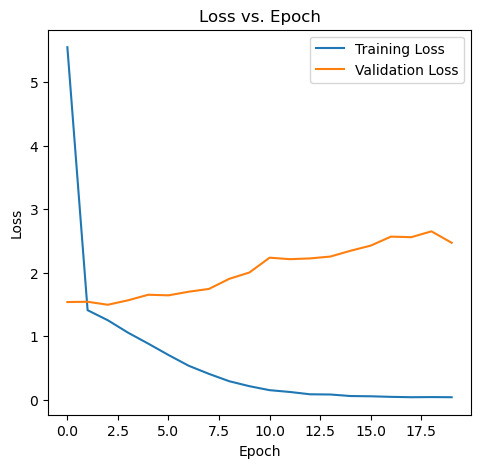

In [12]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

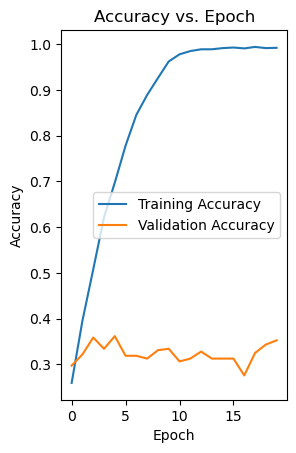

In [13]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Evaluating the Model

In [14]:
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

11/11 [==============================] - 1s 89ms/step - loss: 2.4687 - accuracy: 0.3528
Test Loss: 2.4687
Test Accuracy: 0.3528
